In [1]:
import imagej
import torch
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scyjava

In [2]:
def dump_info(image):
    """A handy function to print details of an image object."""
    name = image.name if hasattr(image, 'name') else None # xarray
    if name is None and hasattr(image, 'getName'): name = image.getName() # Dataset
    if name is None and hasattr(image, 'getTitle'): name = image.getTitle() # ImagePlus
    print(f" name: {name or 'N/A'}")
    print(f" type: {type(image)}")
    print(f"dtype: {image.dtype if hasattr(image, 'dtype') else 'N/A'}")
    print(f"shape: {image.shape}")
    print(f" dims: {image.dims if hasattr(image, 'dims') else 'N/A'}")

In [3]:
ij = imagej.init(mode='interactive')

In [4]:
imagej.__version__

'1.1.1'

In [47]:
x = torch.randint(low=0, high=255, size=(15, 255, 255, 3), dtype=torch.uint16)
dump_info(x)
x

 name: N/A
 type: <class 'torch.Tensor'>
dtype: torch.uint16
shape: torch.Size([15, 255, 255, 3])
 dims: N/A


tensor([[[[128, 148,  17],
          [ 23, 117, 104],
          [ 78, 145, 189],
          ...,
          [109, 185, 147],
          [158, 252, 218],
          [ 90, 118, 137]],

         [[ 29,   7, 136],
          [159,  89,  86],
          [212,  84, 221],
          ...,
          [ 91, 250, 215],
          [237, 168, 109],
          [147, 249, 211]],

         [[173, 234, 156],
          [144, 251, 190],
          [192, 161, 126],
          ...,
          [ 11,  97,   1],
          [142, 102, 209],
          [220,  70,  63]],

         ...,

         [[ 53, 245, 215],
          [220,  46, 209],
          [204,  30, 245],
          ...,
          [195, 146,  43],
          [ 72, 176,  67],
          [  1,  40,  12]],

         [[ 34,  15, 252],
          [165,  20,  21],
          [ 70, 110, 204],
          ...,
          [ 36,  51,  22],
          [210,  69, 189],
          [196,  82,   8]],

         [[181, 212, 147],
          [ 45, 242, 177],
          [ 78,  45, 209],
         

In [48]:
y = np.asarray(x)
dump_info(y)
y

 name: N/A
 type: <class 'numpy.ndarray'>
dtype: uint16
shape: (15, 255, 255, 3)
 dims: N/A


array([[[[128, 148,  17],
         [ 23, 117, 104],
         [ 78, 145, 189],
         ...,
         [109, 185, 147],
         [158, 252, 218],
         [ 90, 118, 137]],

        [[ 29,   7, 136],
         [159,  89,  86],
         [212,  84, 221],
         ...,
         [ 91, 250, 215],
         [237, 168, 109],
         [147, 249, 211]],

        [[173, 234, 156],
         [144, 251, 190],
         [192, 161, 126],
         ...,
         [ 11,  97,   1],
         [142, 102, 209],
         [220,  70,  63]],

        ...,

        [[ 53, 245, 215],
         [220,  46, 209],
         [204,  30, 245],
         ...,
         [195, 146,  43],
         [ 72, 176,  67],
         [  1,  40,  12]],

        [[ 34,  15, 252],
         [165,  20,  21],
         [ 70, 110, 204],
         ...,
         [ 36,  51,  22],
         [210,  69, 189],
         [196,  82,   8]],

        [[181, 212, 147],
         [ 45, 242, 177],
         [ 78,  45, 209],
         ...,
         [ 76, 191, 154],
        

In [50]:
z = xr.DataArray(data=y, dims=['t', 'row', 'col', 'ch'], name='test_img.tif')
dump_info(z)
z

 name: test_img.tif
 type: <class 'xarray.core.dataarray.DataArray'>
dtype: uint16
shape: (15, 255, 255, 3)
 dims: ('t', 'row', 'col', 'ch')


<xarray.DataArray 'test_img.tif' (t: 15, row: 255, col: 255, ch: 3)> Size: 6MB
array([[[[128, 148,  17],
         [ 23, 117, 104],
         [ 78, 145, 189],
         ...,
         [109, 185, 147],
         [158, 252, 218],
         [ 90, 118, 137]],

        [[ 29,   7, 136],
         [159,  89,  86],
         [212,  84, 221],
         ...,
         [ 91, 250, 215],
         [237, 168, 109],
         [147, 249, 211]],

        [[173, 234, 156],
         [144, 251, 190],
         [192, 161, 126],
         ...,
...
         ...,
         [ 72,  56,  15],
         [215,  14, 208],
         [ 17, 151, 112]],

        [[232, 194,  83],
         [ 60,  27, 110],
         [ 68,  39,   3],
         ...,
         [ 49, 221, 234],
         [ 51,   7,  31],
         [125, 185, 159]],

        [[252,  96, 250],
         [105, 248, 211],
         [240,  82,  56],
         ...,
         [ 73, 163, 130],
         [177,  51, 243],
         [144,  33, 169]]]], dtype=uint16)
Dimensions without coordinates: t, row, col, ch

In [56]:
jz = ij.py.to_java(z)
pjz = ij.py.from_java(jz)
pjz.name = 'test_img.tif'
print('[to_java]')
dump_info(jz)
print('\n[from_java]')

dump_info(pjz)

jpjz = ij.py.to_java(pjz)
jpjz.setName('test_img.tif')
print('\n[back to_java]')
dump_info(jpjz)

The compare_version function is deprecated. Use is_version_at_least instead.


[to_java]
 name: N/A
 type: <java class 'net.imagej.DefaultDataset'>
dtype: <java class 'net.imglib2.type.numeric.integer.UnsignedShortType'>
shape: (255, 255, 15, 3)
 dims: N/A

[from_java]
 name: test_img.tif
 type: <class 'xarray.core.dataarray.DataArray'>
dtype: uint16
shape: (15, 255, 255, 3)
 dims: ('t', 'row', 'col', 'ch')

[back to_java]
 name: test_img.tif
 type: <java class 'net.imagej.DefaultDataset'>
dtype: <java class 'net.imglib2.type.numeric.integer.UnsignedShortType'>
shape: (255, 255, 15, 3)
 dims: N/A


In [57]:
ij.ui().show(jpjz)

In [62]:
img_0 = ij.io().open('/mnt/d/NetApp/1-projects/myof-kd-actin-area-quantification/data/raw/20211028-minusiaa_22_R3D_D3D.tif')
dump_info(img_0)

 name: 20211028-minusiaa_22_R3D_D3D.tif
 type: <java class 'net.imagej.DefaultDataset'>
dtype: <java class 'net.imglib2.type.numeric.integer.UnsignedShortType'>
shape: (256, 256, 151)
 dims: N/A


In [65]:
ximg_0 = ij.py.from_java(img_0)
dump_info(ximg_0)

The compare_version function is deprecated. Use is_version_at_least instead.


 name: N/A
 type: <class 'xarray.core.dataarray.DataArray'>
dtype: uint16
shape: (151, 256, 256)
 dims: ('t', 'row', 'col')


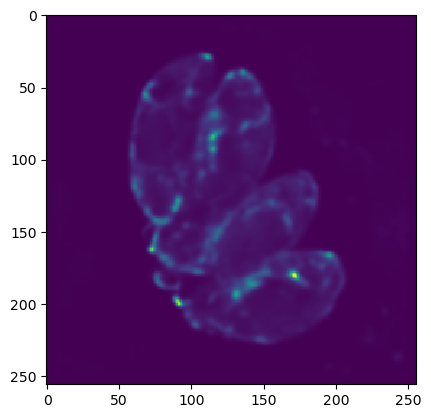

In [83]:
timg_0 = torch.from_numpy(np.array(ximg_0))
timg_0
ij.py.show(timg_0[0])